# Lets Grow More

# LGMVIP OCTOBER 2021

# Data Science Intern

# INTERN NAME: SAYAM KUMAR

## TASK LEVEL: INTERMEDIATE

## Task 1: Exploratory Data Analysis(EDA) on Global Terrorism

## Import the relevant libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

## Import the dataset

In [2]:
data = pd.read_csv('globalterrorismdb.csv',encoding='latin1',low_memory=False)
terrorism_data = data.copy()
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
terrorism_data.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'gname': 'Group', 'country_txt': 'Country', 'region_txt': 'Region', 'provstate': 'State', 'city': 'City', 'latitude': 'Latitude', 'longitude': 'Longitude', 'summary': 'Summary', 'attacktype1_txt': 'Attack Type', 'targtype1_txt': 'Target Type', 'weaptype1_txt': 'Weapon Type', 'nkill': 'Killings', 'nwound': 'Wounds'}, inplace=True)

In [5]:
terrorism_data = terrorism_data[['Year','Month','Day','Group','Country','Region','State','City','Latitude','Longitude','Summary','Attack Type','Target Type','Weapon Type','Killings','Wounds']]
terrorism_data.head()

,Year,Month,Day,Group,Country,Region,State,City,Latitude,Longitude,Summary,Attack Type,Target Type,Weapon Type,Killings,Wounds
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,1970,0,0,23rd of September Communist League,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Unknown,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,1,0,Unknown,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Unknown,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN


In [6]:
terrorism_data.isnull().sum()

Year               0
Month              0
Day                0
Group              0
Country            0
Region             0
State            421
City             434
Latitude        4556
Longitude       4557
Summary        66129
Attack Type        0
Target Type        0
Weapon Type        0
Killings       10313
Wounds         16311
dtype: int64

In [7]:
terrorism_data['Killings'] = terrorism_data['Killings'].fillna(0)
terrorism_data['Wounds'] = terrorism_data['Wounds'].fillna(0)

In [8]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Group        181691 non-null  object 
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   State        181270 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  Summary      115562 non-null  object 
 11  Attack Type  181691 non-null  object 
 12  Target Type  181691 non-null  object 
 13  Weapon Type  181691 non-null  object 
 14  Killings     181691 non-null  float64
 15  Wounds       181691 non-null  float64
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


In [9]:
terrorism_data.describe()

,Year,Month,Day,Latitude,Longitude,Killings,Wounds
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [10]:
terrorism_data['Casualties'] = terrorism_data['Killings'] + terrorism_data['Wounds']

In [11]:
terrorism_data.describe()

,Year,Month,Day,Latitude,Longitude,Killings,Wounds,Casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [12]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Group        181691 non-null  object 
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   State        181270 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  Summary      115562 non-null  object 
 11  Attack Type  181691 non-null  object 
 12  Target Type  181691 non-null  object 
 13  Weapon Type  181691 non-null  object 
 14  Killings     181691 non-null  float64
 15  Wounds       181691 non-null  float64
 16  Casualties   181691 non-null  float64
dtypes: float64(5), int64(3), object(9)
memory usage: 23.6+ MB


## Let's find the total number of attacks per year.

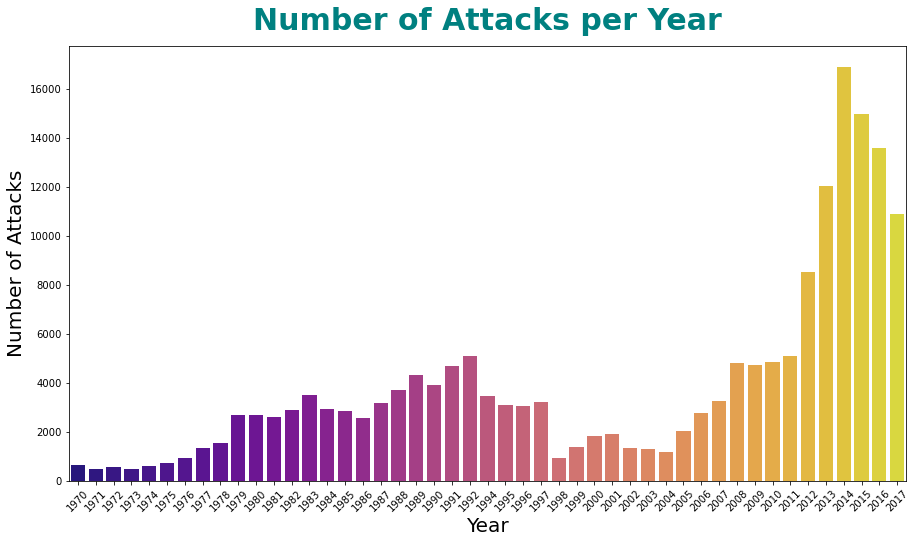

In [13]:
year = terrorism_data['Year'].unique()
no_attacks = terrorism_data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,8))
sns.barplot(x = year, y = no_attacks, data=terrorism_data, palette = "plasma")
plt.xticks(rotation = 45)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.title('Number of Attacks per Year',fontsize=30,color='teal',pad=16,fontweight='bold')
plt.show()

## From the above bar plot, we can observe that most of the attacks have occurred from 2014 onwards.

## There was a sudden rise in terror attacks after the year 2012.

## Maximum number of attacks occurred in 2014.

## Let's find the total number of terrorist activities per region in each year.

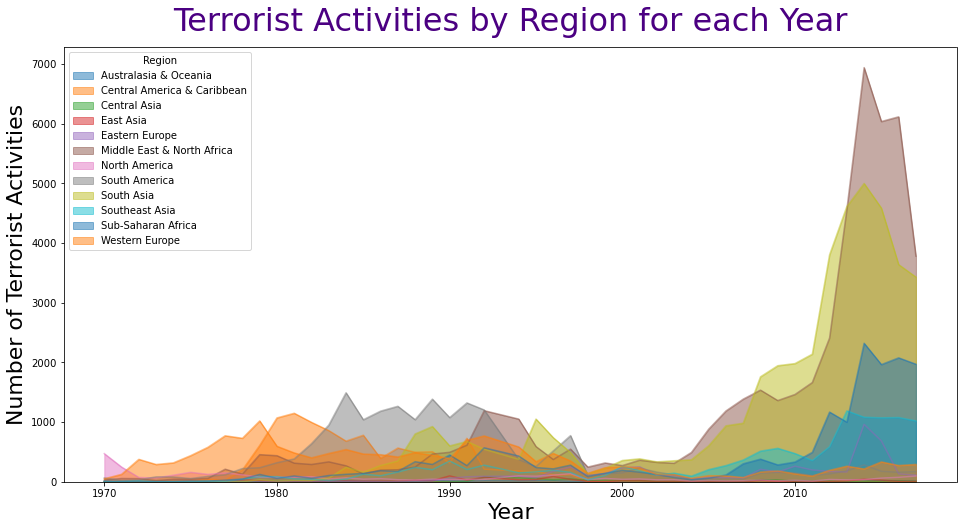

In [14]:
pd.crosstab(terrorism_data.Year,terrorism_data.Region).plot(kind='area',stacked=False,figsize=(16,8))
plt.xlabel('Year',fontsize=22)
plt.ylabel('Number of Terrorist Activities',fontsize=22)
plt.title('Terrorist Activities by Region for each Year',fontsize=32,color='indigo',pad=16)
plt.show()

## The above area chart clearly indicates that maximum number of terrorist activities have been observed in the Eastern European region, followed by South Asian region.

## Let's find the total number of casualties for each city.

In [15]:
terrorism_data.groupby('City')['Casualties'].count().keys()

Index(['62 miles South of Dushanbe', 'A Coruna district', 'A'arbaniyeh',
       'ANkara', 'Aab Kamra', 'Aabde', 'Aabdeh', 'Aabgarmak', 'Aachen',
       'Aadaisse',
       ...
       'uri', 'valledupar', 'valparaiso', 'vilcashuaman', 'villavicencio',
       'vinchos', 'wakunai', 'yacan', 'yokohama', 'zinarag'],
      dtype='object', name='City', length=36674)

In [16]:
terrorism_data.corr()

,Year,Month,Day,Latitude,Longitude,Killings,Wounds,Casualties
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.021252,0.017484,0.020675
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.004031,0.003178,0.003805
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003225,-0.001082,-0.001808
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.013170,0.015920,0.009899
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000587,0.000205,0.000013
Killings,0.021252,0.004031,-0.003225,-0.013170,-0.000587,1.000000,0.443326,0.651885
Wounds,0.017484,0.003178,-0.001082,0.015920,0.000205,0.443326,1.000000,0.968724
Casualties,0.020675,0.003805,-0.001808,0.009899,0.000013,0.651885,0.968724,1.000000


In [17]:
no_attacks = terrorism_data['Country'].value_counts()[:10].sort_values(ascending=False)
no_attacks

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

## Iraq is the hottest zone of terrorism.

## Several countries of South Asian subcontinent, like Pakistan, Afghanistan and India are also hot zones of terrorism.

In [18]:
group = terrorism_data['Group'].value_counts()[1:11]
group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

## Taliban is the group which has been involved in maximum number of attacks, closely followed by Islamic State of Iraq and the Levant (ISIL) and Shining Path of Sri Lanka.

## Let's find the top 10 countries affected.

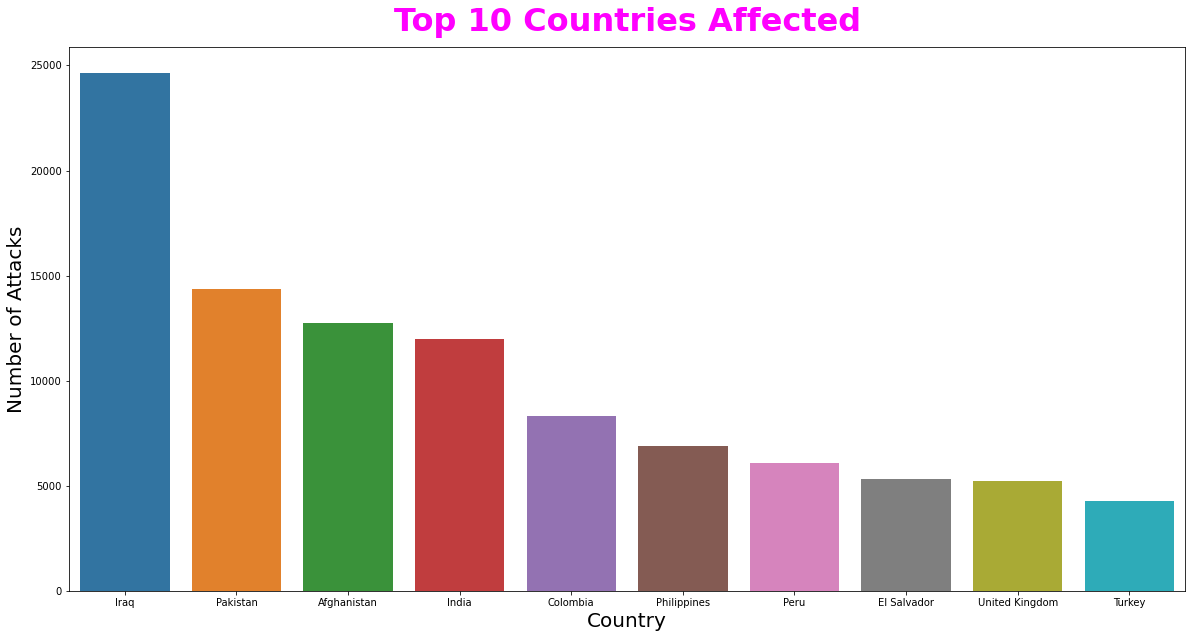

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data['Country'].value_counts()[:10].index,terrorism_data['Country'].value_counts()[:10].values,palette='tab10')
plt.xlabel('Country',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.title('Top 10 Countries Affected',fontsize=32,color='magenta',pad=16,fontweight='bold')
plt.show()

## Iraq is the most affected country with the maximum number of attacks.

## Let's find which states have highest number of terrorist attacks.

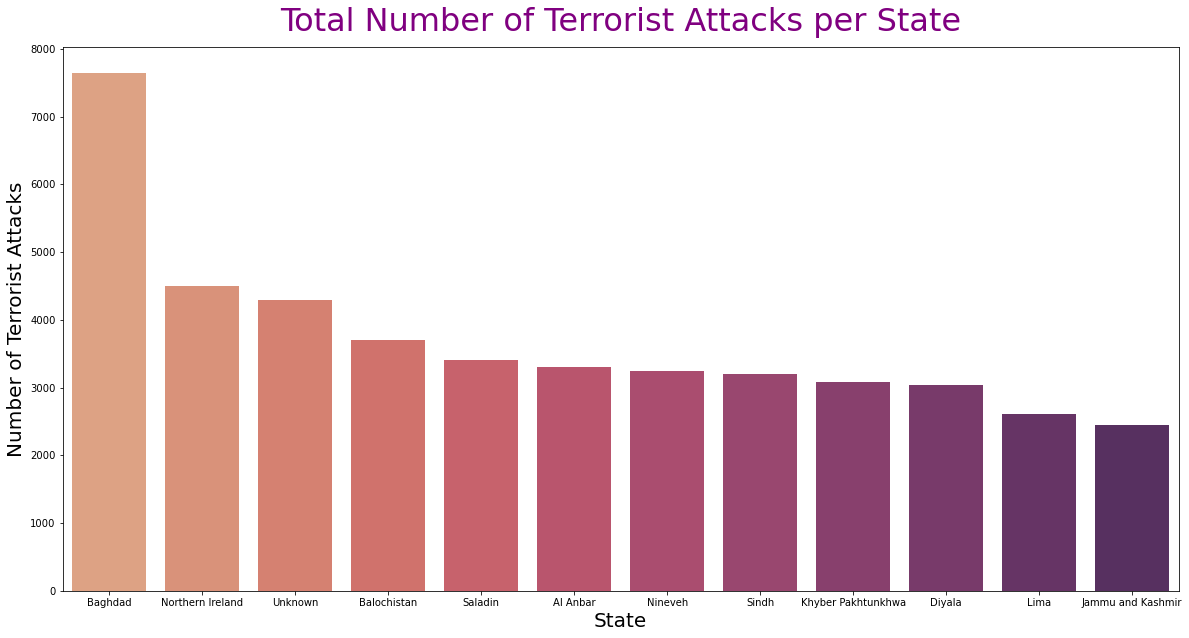

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data['State'].value_counts()[:12].index,terrorism_data['State'].value_counts()[:12].values,palette='flare')
plt.xlabel('State',fontsize=20)
plt.ylabel('Number of Terrorist Attacks',fontsize=20)
plt.title('Total Number of Terrorist Attacks per State',fontsize=32,color='purple',pad=16)
plt.show()

## Baghdad has faced the highest number of terrorist attacks.

## Let's find which country has the maximum number of casualties.

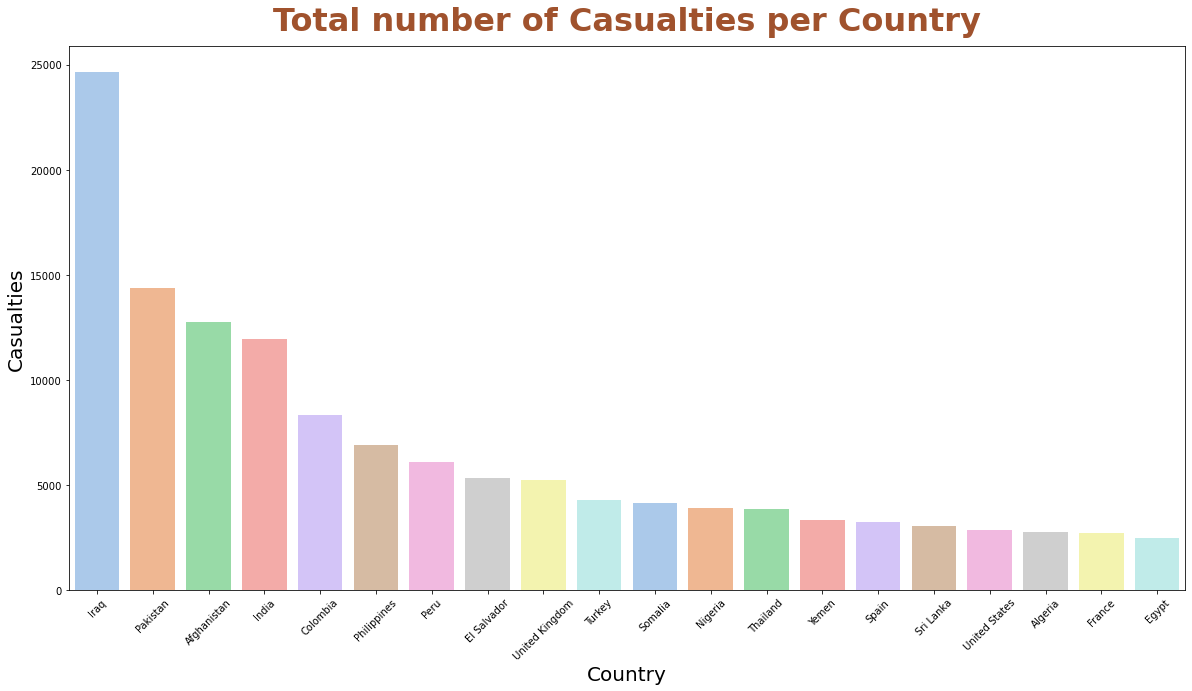

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data.groupby('Country')['Casualties'].count().sort_values(ascending=False)[:20].index,terrorism_data.groupby('Country')['Casualties'].count().sort_values(ascending=False)[:20].values,palette='pastel')
plt.xlabel('Country',fontsize=20)
plt.ylabel('Casualties',fontsize=20)
plt.xticks(rotation=45)
plt.title('Total number of Casualties per Country',fontsize=32,fontweight='bold',color='sienna',pad=16)
plt.show()

## Iraq has the highest number of casualties.

## Let's check which states have the maximum number of casualties.

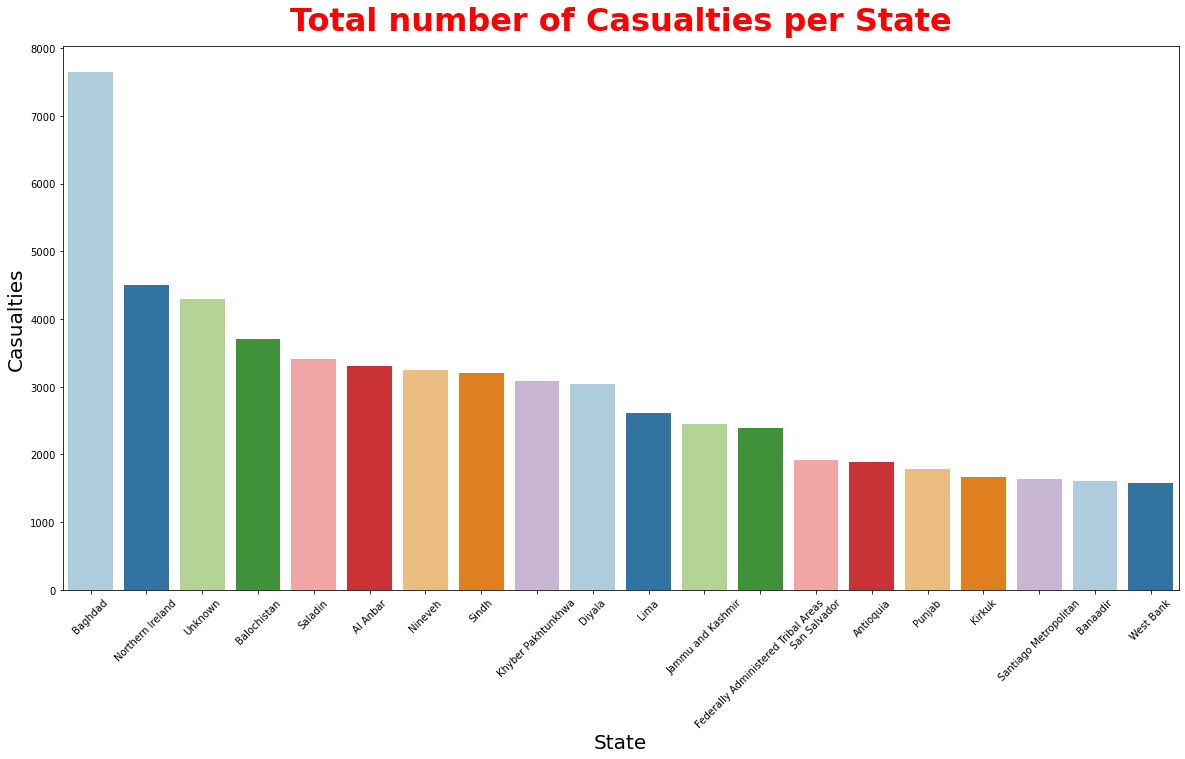

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data.groupby('State')['Casualties'].count().sort_values(ascending=False)[:20].index,terrorism_data.groupby('State')['Casualties'].count().sort_values(ascending=False)[:20].values,palette=sns.color_palette("Paired",9))
plt.xlabel('State',fontsize=20)
plt.ylabel('Casualties',fontsize=20)
plt.xticks(rotation=45)
plt.title('Total number of Casualties per State',fontsize=32,fontweight='bold',color='red',pad=16)
plt.show()

## Maximum number of casualties are there in Baghdad.

## Let's find the top 10 cities whose citizens have been affected the most.

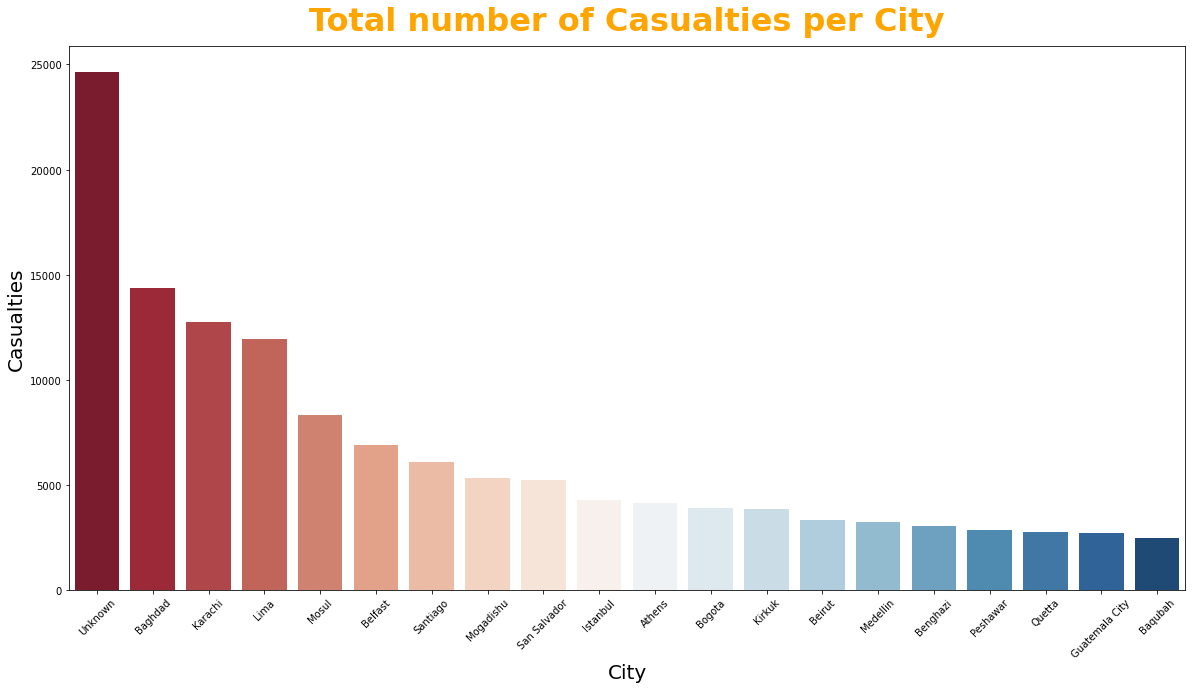

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data.groupby('City')['Casualties'].count().sort_values(ascending=False)[:20].index,terrorism_data.groupby('Country')['Casualties'].count().sort_values(ascending=False)[:20].values,palette='RdBu')
plt.xlabel('City',fontsize=20)
plt.ylabel('Casualties',fontsize=20)
plt.xticks(rotation=45)
plt.title('Total number of Casualties per City',fontsize=32,fontweight='bold',color='orange',pad=16)
plt.show()

## Majority of casualties have been in unknown cities.

## Let's find which are the most targeted regions by terrorists.

In [24]:
group_targets = terrorism_data.groupby(['Target Type'])['Group'].count().sort_values(ascending=False)[:20].reset_index().head(20)
group_targets

,Target Type,Group
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


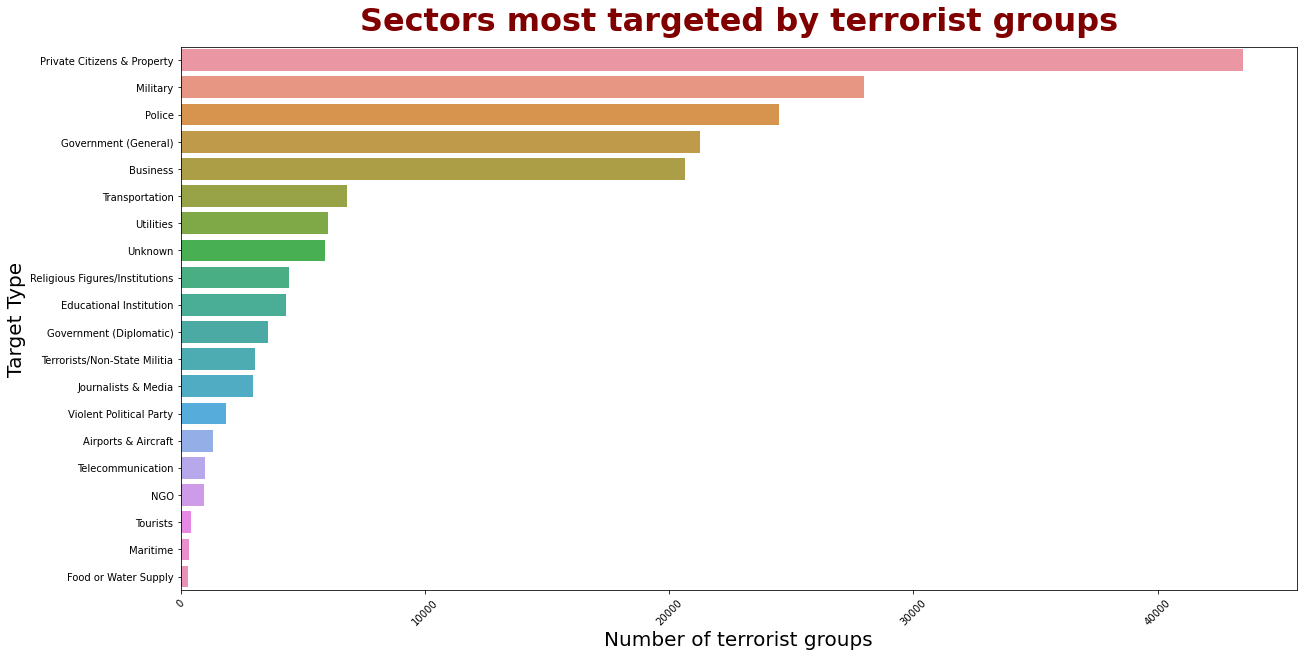

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='Group',y='Target Type',data=group_targets,orient="h")
plt.xticks(rotation=45)
plt.xlabel('Number of terrorist groups',fontsize=20)
plt.ylabel('Target Type',fontsize=20)
plt.title('Sectors most targeted by terrorist groups',fontsize=32,color='maroon',pad=16,fontweight='bold')
plt.show()

## Private citizens and property have been targeted the most by terrorists.

## Let's find which attacks are the most destructive. 

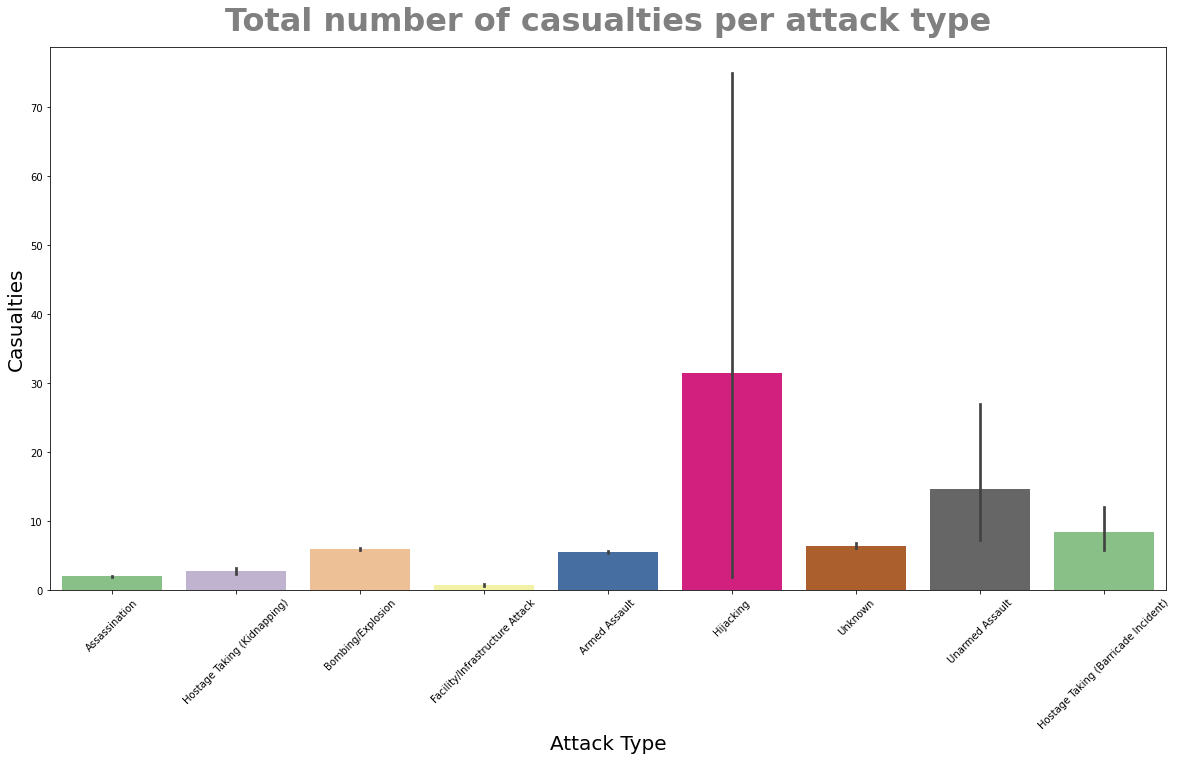

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attack Type',y='Casualties',data=terrorism_data,palette='Accent')
plt.xticks(rotation=45)
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('Casualties',fontsize=20)
plt.title('Total number of casualties per attack type',fontsize=32,color='gray',pad=16,fontweight='bold')
plt.show()

## Maximum number of casualties have occurred due to hijacking by terrorists. 

## Let's find out which terrorist groups killed the most number of people.

In [27]:
group_killings = terrorism_data.groupby(['Group'])['Killings'].count().sort_values(ascending=False)[:20].reset_index().head(20)
group_killings

,Group,Killings
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


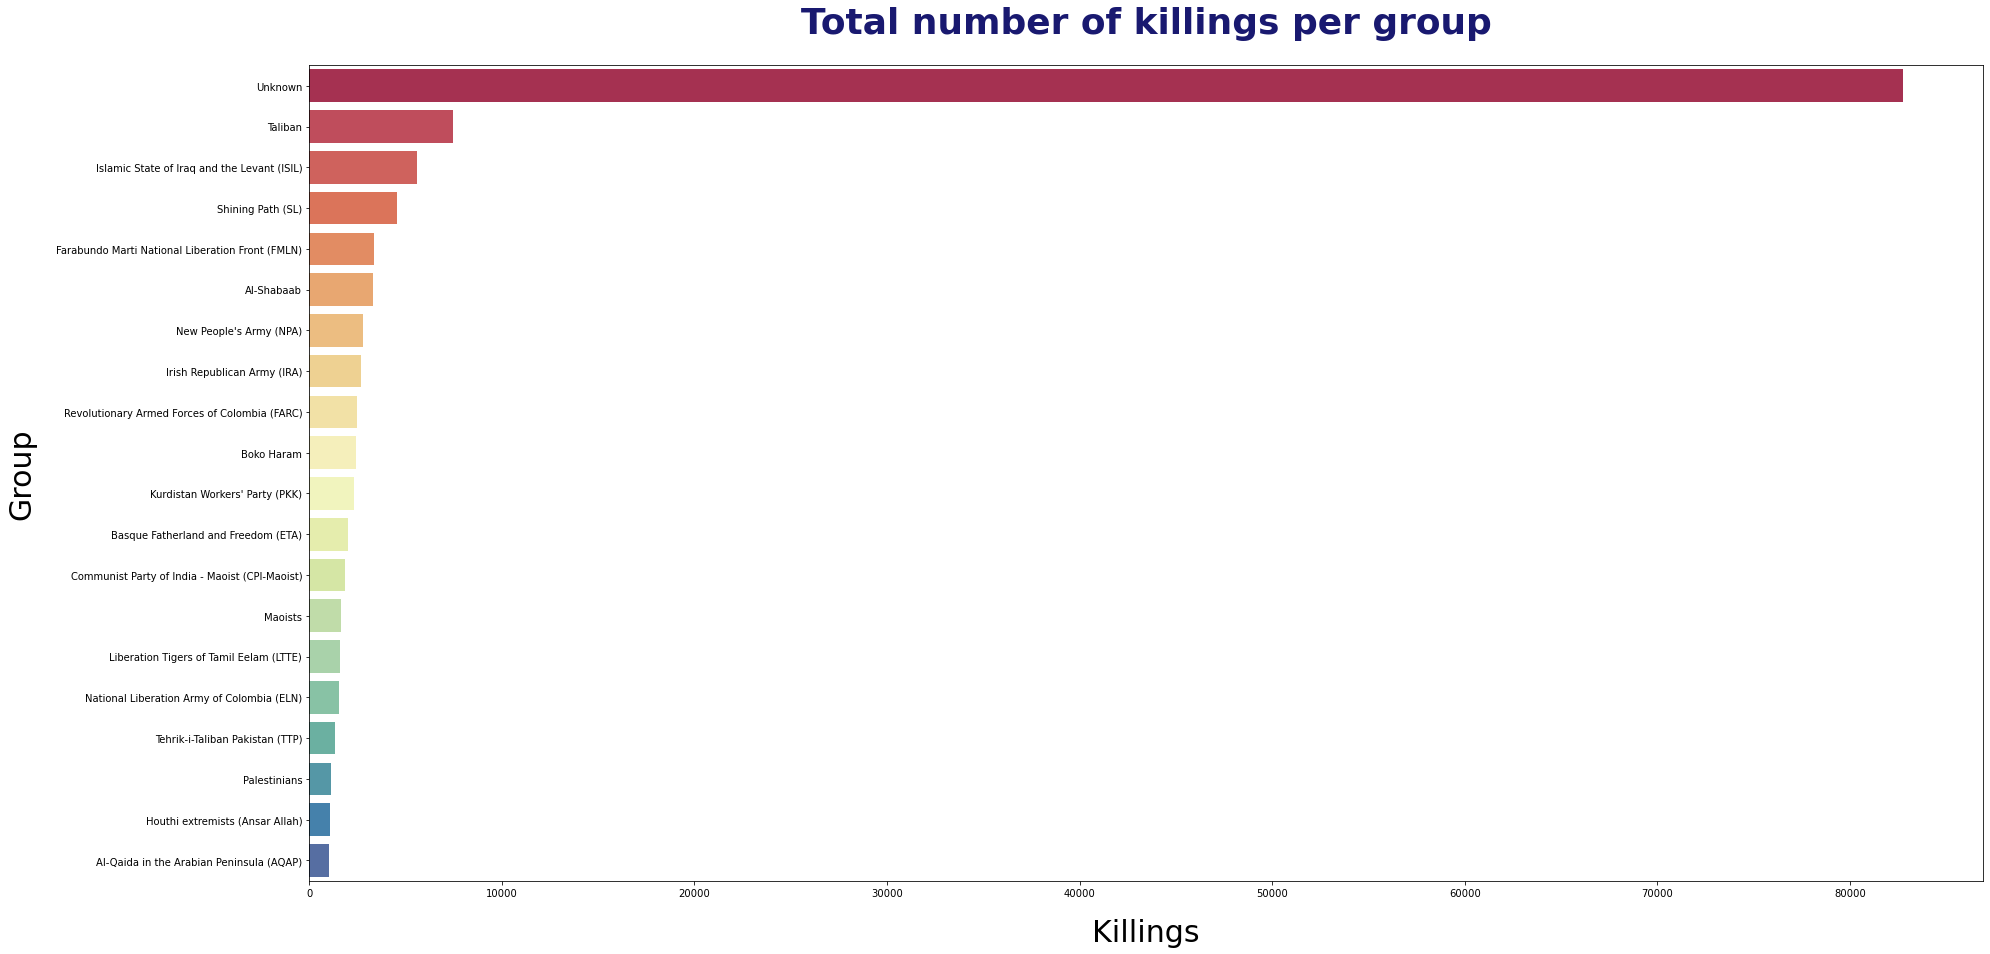

In [28]:
plt.figure(figsize=(30,15))
g = sns.barplot(x='Killings',y='Group',data=group_killings,palette='Spectral',orient='h')
g.set_ylabel('Group',fontsize=30,labelpad=20)
g.set_xlabel('Killings',fontsize=30,labelpad=20)
plt.title('Total number of killings per group',fontsize=36,color='midnightblue',pad=32,fontweight='bold')
plt.show()

## Unknown groups have killed the maximum number of people.

## Let's see which year had the highest number of killings.

In [29]:
killings_by_year = terrorism_data.groupby('Year')['Killings'].count().sort_values(ascending=False).reset_index().head(20)
killings_by_year

,Year,Killings
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


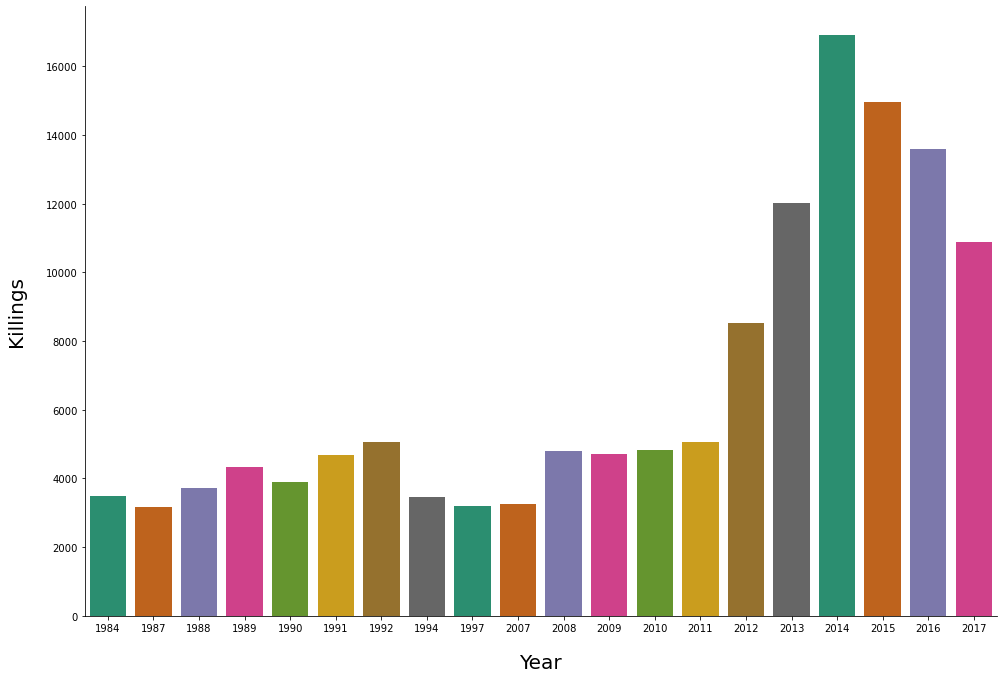

In [40]:
sns.catplot(x='Year',y='Killings',data=killings_by_year,palette='Dark2',kind='bar',height=9,aspect=1.5)
plt.xlabel('Year',fontsize=20,labelpad=20)
plt.ylabel('Killings',fontsize=20,labelpad=20)
plt.show()

## The year 2014 saw the maximum number of killings.

## Let's find out the most popular weapons used for the attacks.

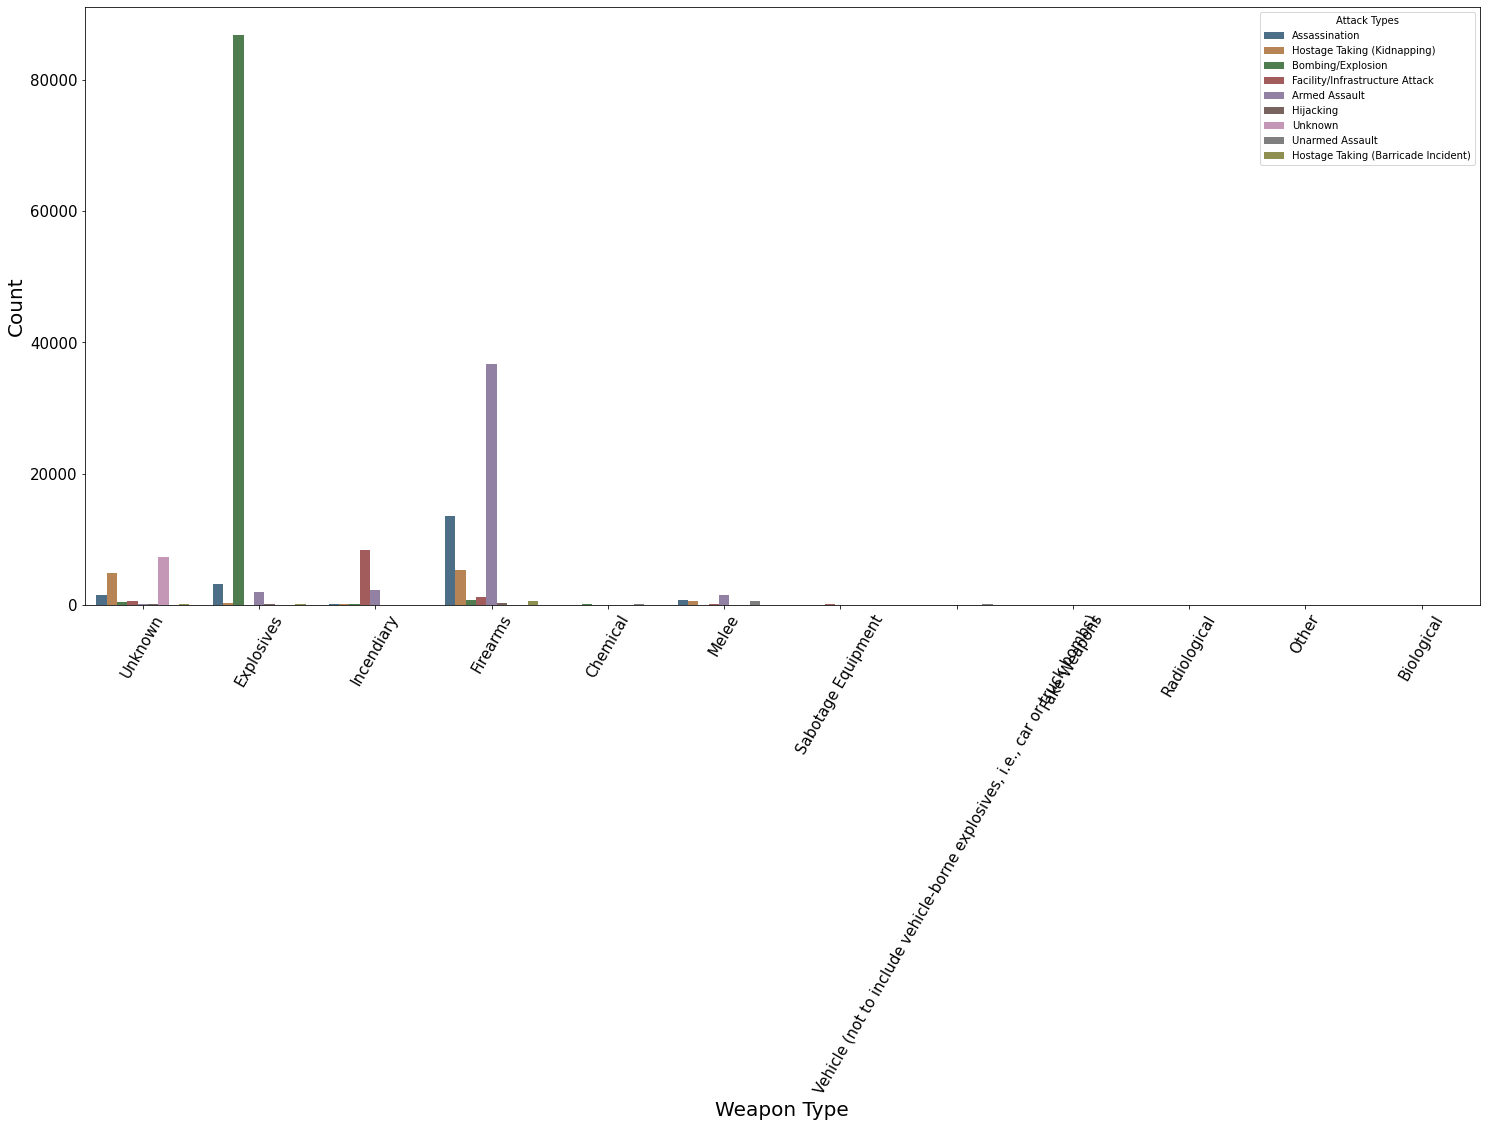

In [31]:
plt.figure(figsize=(25,11))
#sns.barplot(terrorism_data['Weapon Type'].value_counts().sort_values(ascending=False)[:15].index,terrorism_data['Weapon Type'].value_counts().sort_values(ascending=False))
sns.countplot(terrorism_data['Weapon Type'],saturation=0.4,dodge=True,hue=terrorism_data['Attack Type'])
plt.xticks(rotation=60)
plt.legend(loc='upper right',title='Attack Types')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.xlabel('Weapon Type',fontsize=20)
plt.show()

## Explosives are the most used weapons for majority of attacks.

## Let's check the Pearson's correlation coefficients between each pair of numerical variables in the dataset using Pandas' corr() method.

In [32]:
terrorism_data.corr(method='pearson')

,Year,Month,Day,Latitude,Longitude,Killings,Wounds,Casualties
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.021252,0.017484,0.020675
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.004031,0.003178,0.003805
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003225,-0.001082,-0.001808
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.013170,0.015920,0.009899
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000587,0.000205,0.000013
Killings,0.021252,0.004031,-0.003225,-0.013170,-0.000587,1.000000,0.443326,0.651885
Wounds,0.017484,0.003178,-0.001082,0.015920,0.000205,0.443326,1.000000,0.968724
Casualties,0.020675,0.003805,-0.001808,0.009899,0.000013,0.651885,0.968724,1.000000


## Let's draw a heatmap to demonstrate the existing relationships throughout the dataset.

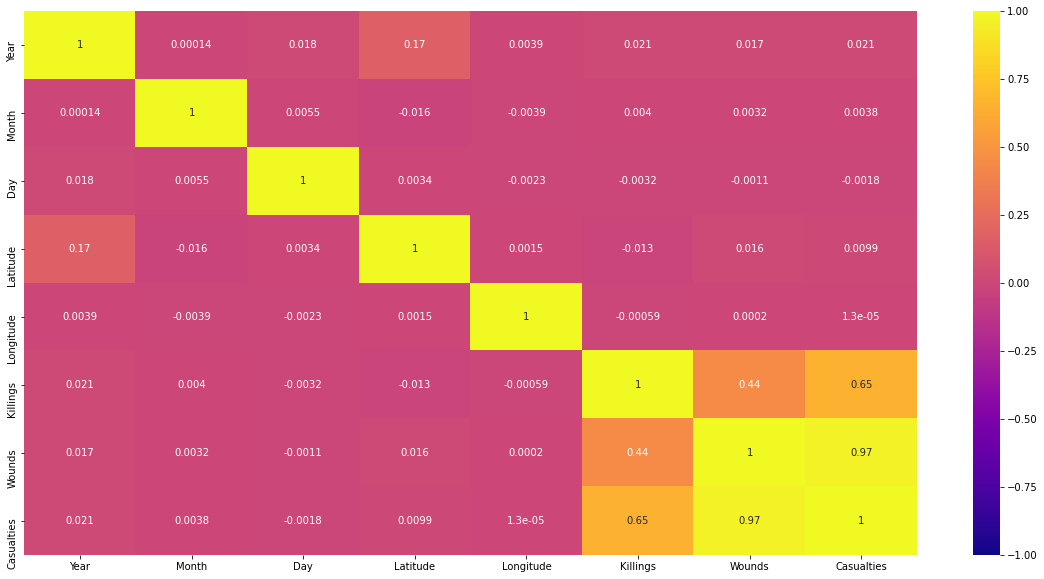

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(terrorism_data.corr(method='pearson'),annot=True,vmin=-1,vmax=1,cmap='plasma')
plt.show()

## Let's check the top 10 years with respect to number of terrorist attacks in the world. 

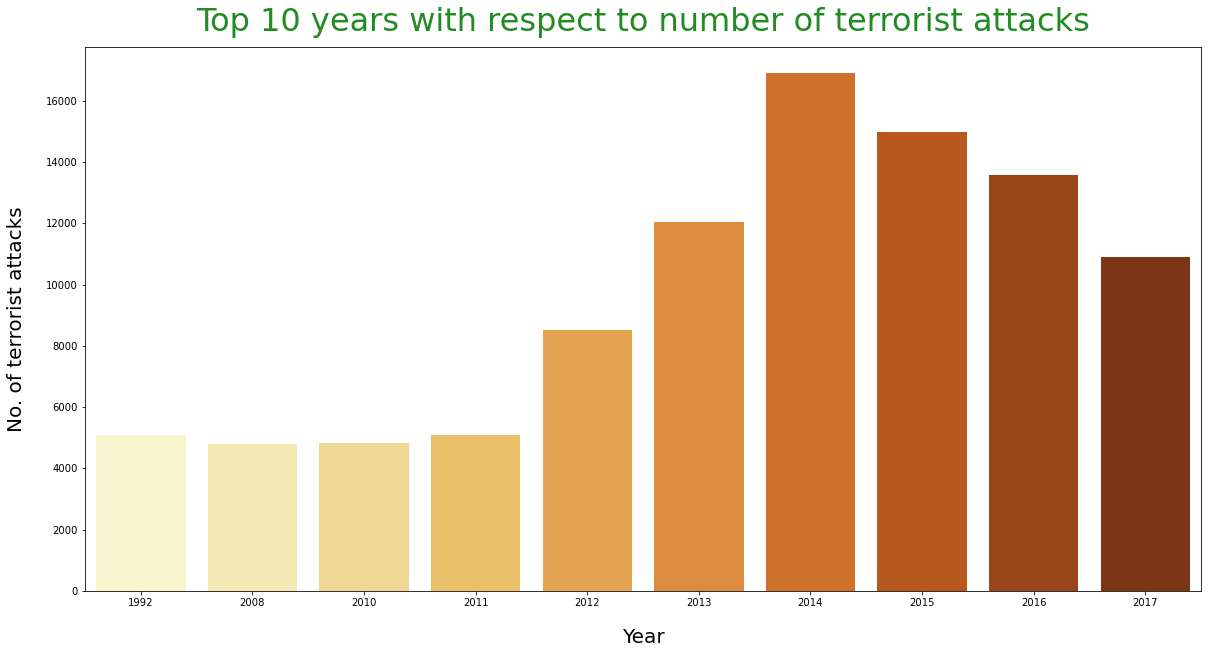

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data['Year'].value_counts().sort_values(ascending=False)[:10].index,terrorism_data['Year'].value_counts().sort_values(ascending=False)[:10].values,palette='YlOrBr')
plt.xlabel('Year',fontsize=20,labelpad=20)
plt.ylabel('No. of terrorist attacks',fontsize=20,labelpad=20)
plt.title('Top 10 years with respect to number of terrorist attacks',fontsize=32,color='forestgreen',pad=16)
plt.show()

## Statistical Analysis

In [52]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print('Maximum value of {} = '.format(col) + str(terrorism_data[col].max()))

Maximum value of Latitude = 74.633553
Maximum value of Longitude = 179.366667
Maximum value of Killings = 1570.0
Maximum value of Wounds = 8191.0
Maximum value of Casualties = 9574.0


In [53]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print('Minimum value of {} = '.format(col) + str(terrorism_data[col].min()))

Minimum value of Latitude = -53.154613
Minimum value of Longitude = -86185896.0
Minimum value of Killings = 0.0
Minimum value of Wounds = 0.0
Minimum value of Casualties = 0.0


In [54]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print('Mean value of {} = '.format(col) + str(terrorism_data[col].mean()))

Mean value of Latitude = 23.49834295928576
Mean value of Longitude = -458.6956530246498
Mean value of Killings = 2.2668596683380025
Mean value of Wounds = 2.8832963658078827
Mean value of Casualties = 5.150156034145885


In [55]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print('Median value of {} = '.format(col) + str(terrorism_data[col].median()))

Median value of Latitude = 31.467463
Median value of Longitude = 43.246506
Median value of Killings = 0.0
Median value of Wounds = 0.0
Median value of Casualties = 1.0


In [56]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print('Standard deviation of {} = '.format(col) + str(terrorism_data[col].std()))

Standard deviation of Latitude = 18.56924242102685
Standard deviation of Longitude = 204778.98861144247
Standard deviation of Killings = 11.227057082482862
Standard deviation of Wounds = 34.30974728802276
Standard deviation of Casualties = 40.55541615664475


In [57]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print('Variance of {} = '.format(col) + str(terrorism_data[col].var()))

Variance of Latitude = 344.8167640908631
Variance of Longitude = 41934434176.72529
Variance of Killings = 126.04681073332857
Variance of Wounds = 1177.1587589679852
Variance of Casualties = 1644.7417796386424


In [58]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print('Skewness of {} = '.format(col) + str(terrorism_data[col].skew()))

Skewness of Latitude = -0.9637382661867352
Skewness of Longitude = -420.87285215867604
Skewness of Killings = 55.66824171046636
Skewness of Wounds = 182.94809242757623
Skewness of Casualties = 167.24605886424544


In [59]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print('Kurtosis of {} = '.format(col) + str(terrorism_data[col].kurtosis()))

Kurtosis of Latitude = 0.8606639837901731
Kurtosis of Longitude = 177133.9717892825
Kurtosis of Killings = 5887.592622599773
Kurtosis of Wounds = 40390.3747983634
Kurtosis of Casualties = 36691.62110741905


## Let's take a look at a few density distributions of all the numerical variables present in the dataset.

Probability Density Function of Latitude:


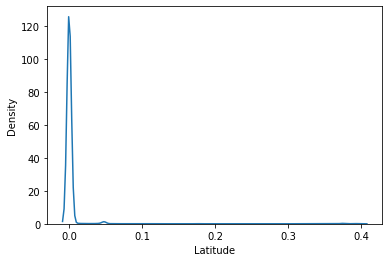

Probability Density Function of Longitude:


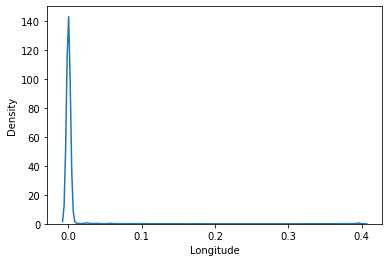

Probability Density Function of Killings:


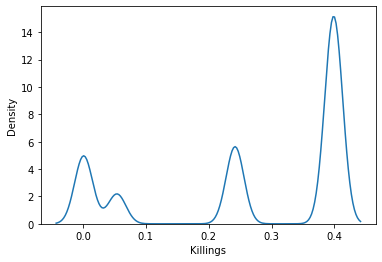

Probability Density Function of Wounds:


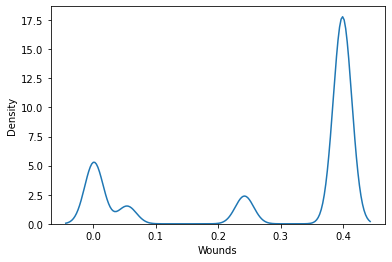

Probability Density Function of Casualties:


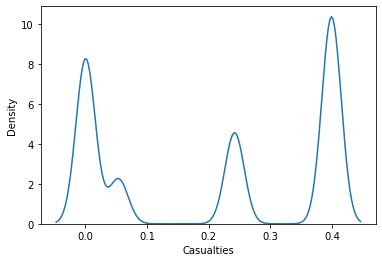

In [69]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print("Probability Density Function of {}:".format(col))
        sns.kdeplot(stats.norm.pdf(terrorism_data[col]))
        plt.xlabel(col)
        plt.show()

Cumulative Density Function of Latitude:


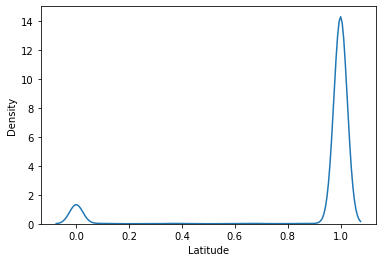

Cumulative Density Function of Longitude:


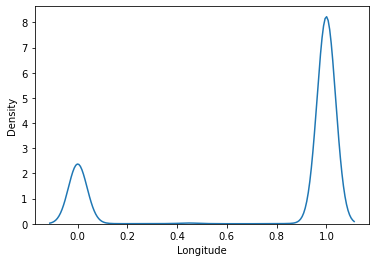

Cumulative Density Function of Killings:


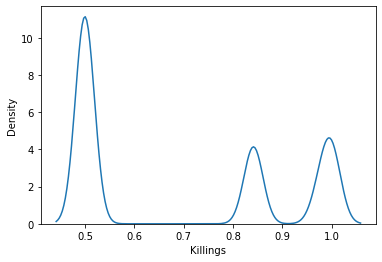

Cumulative Density Function of Wounds:


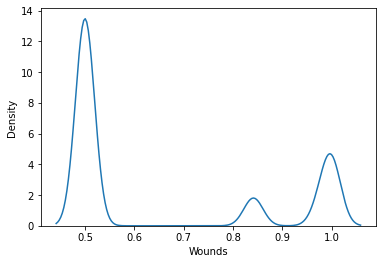

Cumulative Density Function of Casualties:


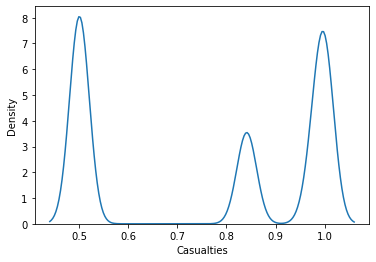

In [68]:
for col in terrorism_data.columns:
    if terrorism_data[col].dtypes==np.float64:
        print("Cumulative Density Function of {}:".format(col))
        sns.kdeplot(stats.norm.cdf(terrorism_data[col]))
        plt.xlabel(col)
        plt.show()

In [76]:
kill = terrorism_data.loc[:,'Killings']
print('Total number of people killed in terrorist attacks:',int(sum(kill.dropna())))

Total number of people killed in terrorist attacks: 411868


In [83]:
attackTypeKill = terrorism_data.pivot_table(columns='Attack Type',values='Killings',aggfunc='sum')
attackTypeKill

Attack Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killings,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [87]:
countryKillings = terrorism_data.pivot_table(columns='Country',values='Killings',aggfunc='sum')
countryKillings

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killings,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [90]:
top_cities = terrorism_data.City.value_counts().reset_index().rename(columns={'index': 'City'})
top_cities.columns.values[1] = 'Number of Terrorist Attacks'
top_cities = top_cities[:10]

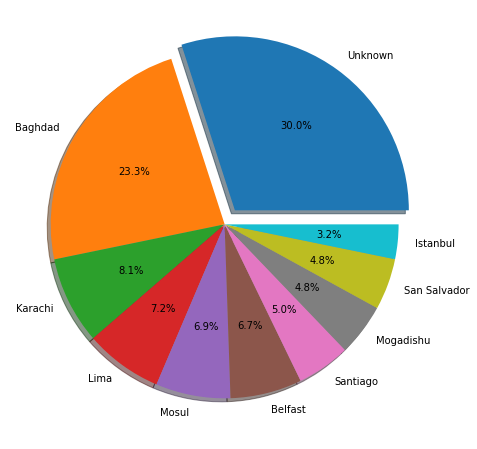

In [96]:
plt.figure(figsize=(8,8))
explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.pie(top_cities['Number of Terrorist Attacks'],labels=top_cities['City'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

## 30% terror attacks are from unknown cities.
## 23.3% of the attacks have arised from Baghdad.

## Observations and Conclusions

1. Top countries which have faced Terrorist attacks contain mostly Asian countries like Iraq,Pakistan,Afganistan,India and more.
2. Almost 54.9% attacks are faced by top 10 mostly attacked countries have of total world's count of attacks
3. 24.7% of attacks occurred in Iraq while "India" has 12% of the attacks.
4. Top target sectors used for attacks are Private Citizens & Property, Military, Police, Government and Business.
5. Mostly Explosives, Firearms, Incendiary and Melee weapons are used for terrorist attack.
6. From 2012, there is a sudden rise in terrorism, with 2014 having the most number of terrorist attacks in the world.
7. Asian and European countries are mainly the hotspots of terrorism.

